In [72]:
pwd

'/home/stefan/akad/projekte/ned_imagepairs'

In [59]:
%matplotlib `inline
import matplotlib.pyplot as plt

In [60]:
from skimage import io, transform, color, exposure
import numpy as np

In [61]:
img0 = io.imread('nir1.JPG')
img1 = io.imread('vis1.JPG')
H = np.loadtxt('000.001.H')

print(img0.min(), img0.max())
print(img1.min(), img1.max())

2 255
0 255


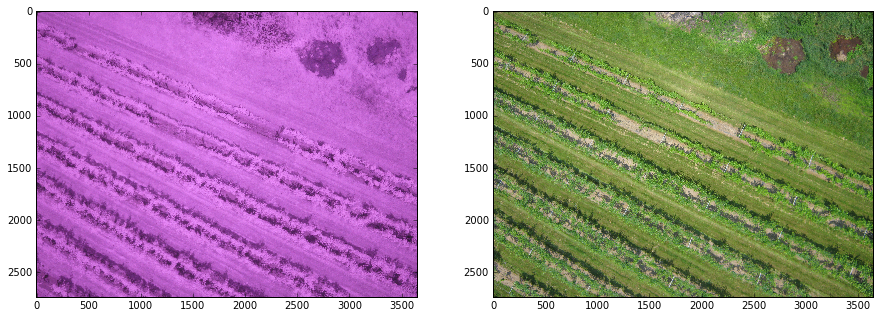

In [62]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 10))
ax0.imshow(img0)
ax1.imshow(img1)

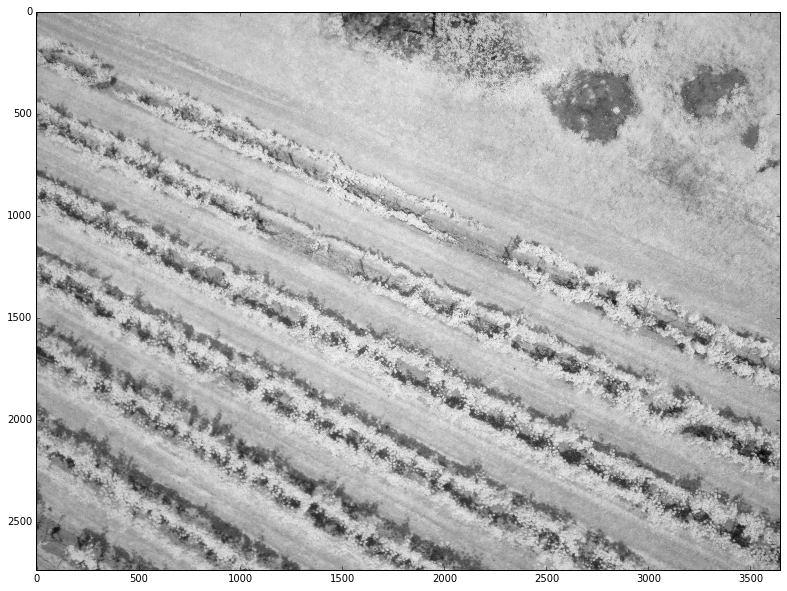

In [63]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
img0_darker = img0 / img0.max()
ax.imshow(img0_darker[..., 0], cmap='gray')

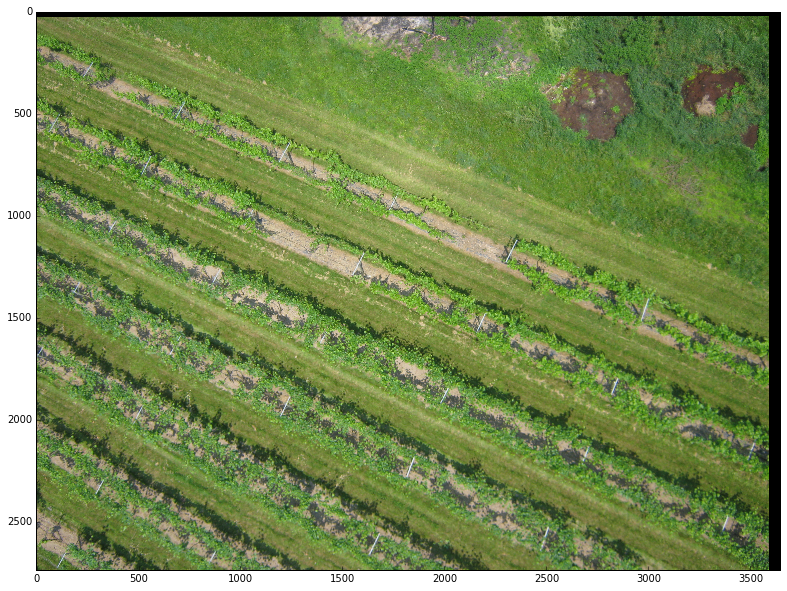

In [64]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(warped)

In [65]:
tf = transform.AffineTransform(matrix=H)

In [66]:
warped = transform.warp(img1, tf)

In [67]:
print(warped.min(), warped.max())

0.0 0.999998505709


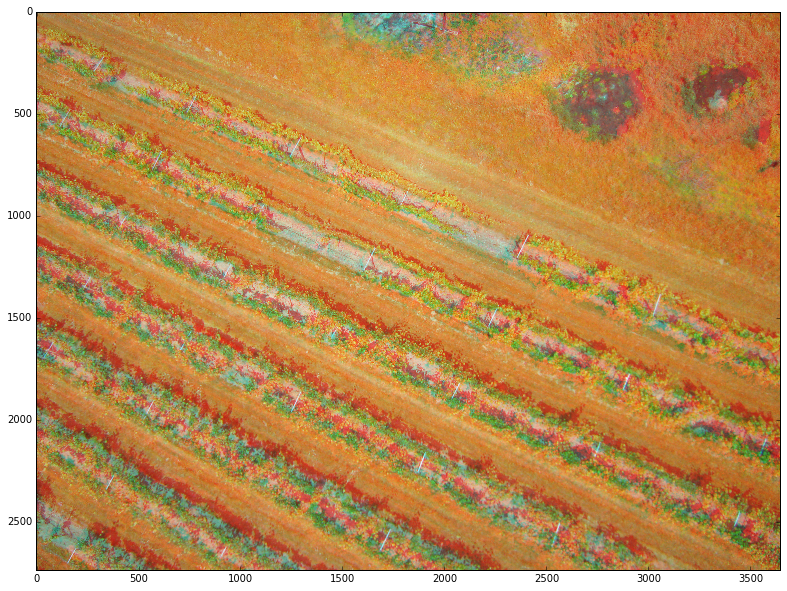

In [68]:
f, ax = plt.subplots(figsize=(15, 10))

spliced = img1.copy()
spliced[..., 0] = img0[..., 0]

plt.imshow(spliced, vmin=0, vmax=1)

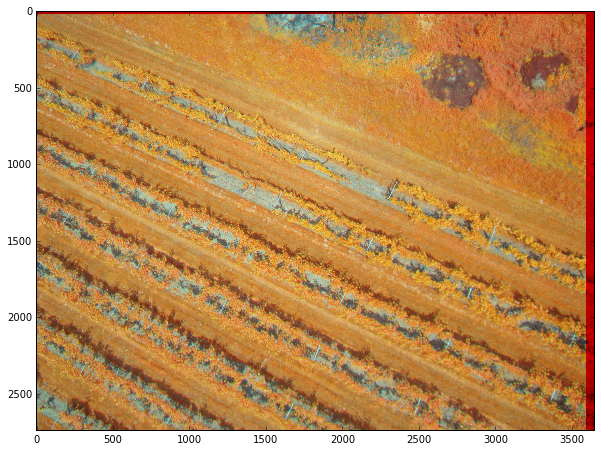

In [69]:
f, ax = plt.subplots(figsize=(10, 10))

spliced = warped.copy()
spliced[..., 0] = img0_darker[..., 0]

plt.imshow(spliced, vmin=0, vmax=1)

In [70]:
img0.shape

(2736, 3648, 3)

In [71]:
plt.imsave('/tmp/spliced.png', spliced)